In [ ]:
!pip install -q sklearn # Una librería de machine learning para python

In [ ]:
%tensorflow_version 2.x # Asegura que le versión de TF es la 2.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # Asegura que le versión de TF es la 2.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


REGRESIÓN LINEAL

(0.0, 6.0, 0.0, 20.0)

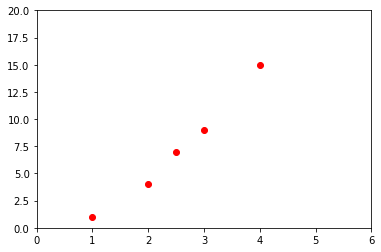

In [ ]:
# Nube de puntos
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

In [ ]:
# Recta que mejor se ajusta a los puntos (muestra)
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [ ]:
# Importación de librerías y módulos necesarios para regresión lineal

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np # módulo con versión mejorada de arrays en python para cálculos con arrays multidimensionales
import pandas as pd # módulo para manipular y visualizar datasets 
import matplotlib.pyplot as plt # módulo para pintar gráficas
from IPython.display import clear_output # específico para limpiar el output de este IDE
from six.moves import urllib #

import tensorflow.compat.v2.feature_column as fc # Feature Column es un requerimiento para usar Regresión Lineal

import tensorflow as tf 

DATOS
(Supervivencia de pasajos del Titanic)

In [ ]:
# CARGA DE DATOS

# Carga de datos para entrenar el modelo en un "Dataframe" que es como una tabla
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data

# Datos para testear el modelo (medir su valor predictivo)
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data

# Apartamos la columna de resultados de cada dataset
y_train = dftrain.pop('survived') # entrenamiento
y_eval = dfeval.pop('survived') # test



In [ ]:
dftrain.head() # muestra una muestra (valga la redundancia) del dataframe

In [ ]:
dftrain.describe() # estadísticas del dataframe

In [ ]:
dftrain.shape # 627 eltos. distribuidos en 9 líneas (columnas)

In [ ]:
y_train.head() # la primera columna es el nº de registro. La segunda indica supervivencia

ALGUNAS GRÁFICAS A PARTIR DE LOS DATOS DE ENTRENAMIENTO DEL MODELO

In [ ]:
dftrain.age.hist(bins=20) # Histograma de edades
# La mayoría de los pasajeros tenían entre 20-30 años.

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')
# la mayoría de pasajeros eran hombres

In [ ]:
dftrain['class'].value_counts().plot(kind='barh') # Pasajeros de primera, segunda y tercera clase
# la mayoría de pasajeros viajaban en tercera clase

In [ ]:
# Media de supervivencia según el sexo
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')
# Las mujeres tuvieron la mayor tasa de supervivencia


FEATURE COLUMNS

In [ ]:
# Datos discretos o "Categorical", qué son?
dftrain['embark_town'].unique() # valores unicos del campo 'embark_town'

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

In [ ]:
# TRATAMIENTO DE DATOS

# Datos discretos
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
# Datos numéricos
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = [] # declaración de array

# Generación y adición de feature columns

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique() # crea un diccionario con los nombres únicos
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)) # produce feature columns a partir del diccionario

for feature_name in NUMERIC_COLUMNS: # con valores numéricos no es necesario crear un diccionario
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32 ))


In [ ]:
print(feature_columns) # Podemos ver el contenido del array y ver cómo se almacena la información "categorical" y "numeric" dentro de las "feature columns"

###INPUT FUNCTION + CREACIÓN DEL MODELO + ENTRENAMIENTO DEL MODELO
Una función para alimentar al modelo en batches y epochs
Esta función devuelve un objeto ```tf.data.Dataset``` que usaremos para entrenar el modelo.

In [ ]:
# Definimos una función creadora de Input functions

# Parámetros:
# - datos
# - label
# - epochs
# - randomizado
# - tamaño de lote

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function(): # función interna, que será devuelta por la función envolvente
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) # crea un objeto tf.data.Dataset 
    if shuffle:
      ds = ds.shuffle(1000) # randomizado de datos (registros entran de forma aleatoria)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds # devuelve un batch del dataset
  return input_function # devuelve una input function

# usando la función creadora de input functions

# creamos las inputs functions
train_input_fn = make_input_fn(dftrain, y_train) # esta función, devuelve una input function con los datos de entrenamiento, que podremos usar para entrenar el modelo
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False) # input function con los datos de evaluación

# Instanciamos modelo a partir de las feature columns
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns )

# Entrenamos el modelo usando la input function de los datos de entrenamiento
linear_est.train(train_input_fn)

result = linear_est.evaluate(eval_input_fn) # Evaluamos el modelo con la input function de datos de evaluación
clear_output() # limpiamos consola
print(result['accuracy']) # Cálculo tras comparar la supervivencia real de TODOS los pasajeros, respecto a lo que el modelo había predicho. Es un valor agregado.

# Probar
# Ejecutar de nuevo este bloque -> varía el randomizado de entrenamiento con los datos
# Cambiar parámetros de input function -> epochs, batches

In [ ]:
print(result)#otros datos de la evaluación del modelo

NameError: ignored

In [ ]:
# Vamos a usar el modelo para hacer predicciones sobre CADA UNO DE LOS PASAJEROS DEL TITANIC
# Al igual que necesitamos una input function para entrenar el modelo, también necesitamos darle una input function para hacer predicciones
# Esa vez le damos la input function de los datos de evaluación (hey, modelo, si el pasajero tiene estas características cuáles son sus probabilidades de sobrevivir?)
pred_dicts = list(linear_est.predict(eval_input_fn)) # Crea una lista key:value con la probabilidad


print(pred_dicts) # aquí están almacenados diccionarios de predicción, uno por pasajero


In [ ]:
print(pred_dicts[0]) # diccionario de predicción de un solo pasajero

In [ ]:
print(pred_dicts[0]['probabilities']) # valor almacenado en supervivencia. El primer valor (0) es la letalidad y el segundo es la supervivencia

In [ ]:
print(pred_dicts[0]['probabilities'][1]) # Probabilidad de supervivencia del pasajero 1
print(pred_dicts[0]['probabilities'][0]) # Probabilidad de morir del pasajero 1
print(dfeval.loc[0]) # Valores del dataframe asociados al primer pasajero
print(y_eval.loc[3]) # ¿Sobrevivió o no?

In [ ]:
# Qué tal le iría al pasajero nº 2
print(pred_dicts[4]['probabilities'][1]) 
print(pred_dicts[4]['probabilities'][0]) 
print(dfeval.loc[4]) 
print(y_eval.loc[4]) # ¿Sobrevivió o no?
# Vemos que el valor real no tiene porqué coincidir con lo que actualmente pasó porque el modelo no es perfecto

In [1]:
# Crea 
pred_dicts = list(linear_est.predict(eval_input_fn)) # Devuelve una lista de diccionarios de supervivencia
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts]) # clasifica en los datos por probabilidad de supervivencia
probs.plot(kind='hist', bins=20, title='Probabilidades predichas') # pinta la clasificación anterior

# Vemos que, por ejemplo, lo más frecuente es que la probabilidad de supervivencia esté entre el 0 y el 20%.

NameError: ignored